In [1]:
# Code was originally written by E. Ndedi on March 13, 2024.
# Updated by T. Majidzadeh on April 16, 2024 to work with GitHub directory, include wide view statistics, additional plots.

## import necessary libraries and packages
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
from pathlib import Path
from mpl_toolkits.mplot3d import Axes3D

mids_dir = Path("D:\\MIDS-W207")
soccertrack = mids_dir/"datasets/soccertrack"
soccertrack_square = mids_dir/"datasets/soccertrack_square"
project = mids_dir/"MIDS-W207-Spring24-Soccer-Detection"
analysis = project/"analysis"

# importing sys
import sys

In [2]:
# Import & filter
ball_cols = ['ball','ball.1','ball.2','ball.3']

top_view = pandas.read_csv(soccertrack/"labels/top_view_labels_stacked/top_view_labels.csv")
top_view = top_view.drop(labels = [0,1], axis = 0)
top_view = top_view[top_view['frame_saved'] == True]
top_view_ball = top_view[ball_cols]
top_view_ball.head()


C:\Users\timot\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ball,ball.1,ball.2,ball.3
2,10.0,1916.0,1073.0,10.0
3,9.75,1910.75,1073.75,9.75
4,9.5,1905.5,1074.5,9.5
5,9.25,1900.25,1075.25,9.25
6,9.0,1895.0,1076.0,9.0


In [3]:
print(top_view_ball['ball'].describe())
print(top_view_ball['ball.1'].describe())
print(top_view_ball['ball.2'].describe())
print(top_view_ball['ball.3'].describe())

count     51964.0
unique      593.0
top          14.0
freq      12579.0
Name: ball, dtype: float64
count     51964.0
unique    29978.0
top        1607.0
freq        215.0
Name: ball.1, dtype: float64
count     51964.0
unique    27351.0
top         911.0
freq        358.0
Name: ball.2, dtype: float64
count     51964.0
unique      641.0
top          14.0
freq      12324.0
Name: ball.3, dtype: float64


In [4]:
## account for missing
print(pandas.isnull(top_view_ball['ball']).sum())
print(pandas.isnull(top_view_ball['ball.1']).sum())
print(pandas.isnull(top_view_ball['ball.2']).sum())
print(pandas.isnull(top_view_ball['ball.3']).sum())

1256
1256
1256
1256


In [5]:
top_view_ball.shape

(53220, 4)

In [6]:
top_view_ball = top_view_ball.dropna().reset_index(drop=True).astype(float)

In [7]:
# Renaming the frame coordinates
top_view_ball.rename(columns = {'ball':'bb_height','ball.1':'bb_left','ball.2':'bb_top','ball.3':'bb_width'}, inplace = True)
top_view_ball.head()

,bb_height,bb_left,bb_top,bb_width
0,10.00,1916.00,1073.00,10.00
1,9.75,1910.75,1073.75,9.75
2,9.50,1905.50,1074.50,9.50
3,9.25,1900.25,1075.25,9.25
4,9.00,1895.00,1076.00,9.00


In [8]:
# Get summary statistics and save.
top_view_ball.agg(
    ['count', 'mean', 'std', 'min', 'max'], axis=0
)[['bb_left', 'bb_top', 'bb_width', 'bb_height']].to_csv(
    analysis/"EDA/top_view_stats.csv"
)

In [9]:
# TM Add: Wide view
wide_view = pandas.read_csv(soccertrack/"labels/wide_view_labels_stacked/wide_view_labels.csv")
wide_view = wide_view.drop(labels = [0,1], axis = 0)
wide_view = wide_view[wide_view['frame_saved'] == True]
wide_view_ball = wide_view[ball_cols]
wide_view_ball.head()

C:\Users\timot\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ball,ball.1,ball.2,ball.3
2,7.0,3542.0,549.0,6.0
3,7.0,3548.0,549.0,6.0
4,7.0,3554.0,549.0,6.0
5,7.0,3560.0,549.0,6.0
6,7.0,3565.0,549.0,6.0


In [10]:
print(pandas.isnull(wide_view_ball['ball']).sum())
print(pandas.isnull(wide_view_ball['ball.1']).sum())
print(pandas.isnull(wide_view_ball['ball.2']).sum())
print(pandas.isnull(wide_view_ball['ball.3']).sum())

580
580
580
580


In [11]:
wide_view_ball.shape

(47322, 4)

In [12]:
wide_view_ball = wide_view_ball.dropna().reset_index(drop=True).astype(float)

In [13]:
# Renaming the frame coordinates
wide_view_ball.rename(columns = {'ball':'bb_height','ball.1':'bb_left','ball.2':'bb_top','ball.3':'bb_width'}, inplace = True)
wide_view_ball.head()

,bb_height,bb_left,bb_top,bb_width
0,7.0,3542.0,549.0,6.0
1,7.0,3548.0,549.0,6.0
2,7.0,3554.0,549.0,6.0
3,7.0,3560.0,549.0,6.0
4,7.0,3565.0,549.0,6.0


In [14]:
# Get summary statistics and save.
wide_view_ball.agg(
    ['count', 'mean', 'std', 'min', 'max']
)[['bb_left', 'bb_top', 'bb_width', 'bb_height']].to_csv(
    analysis/"EDA/wide_view_stats.csv"
)

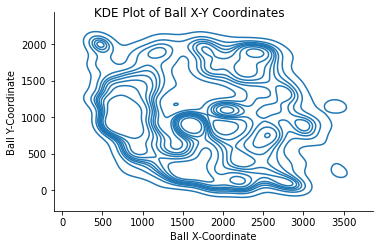

In [15]:
# plotting: KDE plot.
df_3 = top_view_ball[['bb_left','bb_top']]
plot = sns.displot(
    df_3, x="bb_left", y="bb_top", kind="kde", height = 3.5, aspect = 1.54
)
plot.figure.suptitle("KDE Plot of Ball X-Y Coordinates")
plot.set_xlabels("Ball X-Coordinate")
plot.set_ylabels("Ball Y-Coordinate")
plot.savefig(analysis/"EDA/kde_plot.jpg")

In [16]:
# TM Added bar plots of object counts in SRS vs Oversampled sets.
objects_per_image_srs = pandas.read_csv(
    soccertrack_square/"objects_per_image_srs.csv"
).drop("Unnamed: 0", axis=1)
srs_total = objects_per_image_srs[['img_ball_count', 'img_team_0_count' ,'img_team_1_count']].values.sum()
objects_per_image_oversampled = pandas.read_csv(
    soccertrack_square/"objects_per_image_oversampled.csv"
).drop("Unnamed: 0", axis=1)
oversampled_total = objects_per_image_oversampled[['img_ball_count', 'img_team_0_count' ,'img_team_1_count']].values.sum()

In [17]:
# Calculate values for bar plots.
srs_counts = objects_per_image_srs[
    ['img_ball_count', 'img_team_0_count', 'img_team_1_count']
].agg(sum) / srs_total
oversampled_counts = objects_per_image_oversampled[
    ['img_ball_count', 'img_team_0_count', 'img_team_1_count']
].agg(sum) / oversampled_total

In [18]:
srs_counts

img_ball_count      0.037524
img_team_0_count    0.476355
img_team_1_count    0.486121
dtype: float64

In [19]:
oversampled_counts

img_ball_count      0.075945
img_team_0_count    0.462108
img_team_1_count    0.461947
dtype: float64

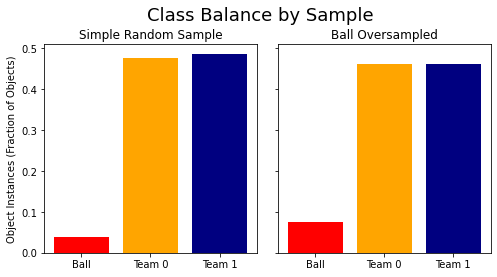

In [20]:
# Plotting
fig, ax = plt.subplots(ncols=2, sharey=True, facecolor='white')
fig.set_size_inches((8,4))
fig.suptitle("Class Balance by Sample", fontsize = 18)
ax[0].bar(["Ball", "Team 0", "Team 1"], srs_counts.values, color=['red', 'orange', 'navy'])
ax[0].set_title("Simple Random Sample")
ax[0].set_ylabel("Object Instances (Fraction of Objects)")
ax[1].bar(["Ball", "Team 0", "Team 1"], oversampled_counts.values, color=['red', 'orange', 'navy'])
ax[1].set_title("Ball Oversampled")
plt.subplots_adjust(top=0.85, wspace=0.1)
plt.savefig(analysis/"EDA/class_balance.png")

In [21]:
ball_in_image_srs = sum(objects_per_image_srs['img_ball_count']) / 10400
ball_in_image_oversampled = sum(objects_per_image_oversampled['img_ball_count']) / 10400

In [22]:
ball_in_image_srs

0.11711538461538462

In [23]:
ball_in_image_oversampled

0.5

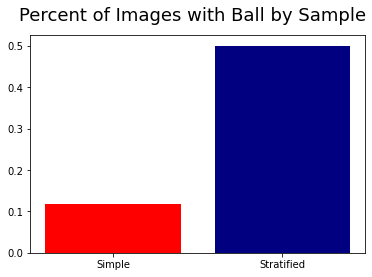

In [24]:
fig, ax = plt.subplots(facecolor='white')
fig.set_size_inches((6,4))
fig.suptitle("Percent of Images with Ball by Sample", fontsize = 18)
ax.bar(["Simple", "Stratified"], [ball_in_image_srs, ball_in_image_oversampled], color=['red', 'navy'])
ax.set_ylabel("")
plt.savefig(analysis/"EDA/pct_images_with_ball.png")